In [119]:
import numpy as np
import scipy.io
from PIL import Image 
from training_helpers import plot_with_joints
from torchvision.io import read_image

In [87]:
np.load('leeds_sports_extended.npy')

array([[[  0.        ,  75.71063741, 149.31389391, ..., 154.71535102,
          49.67604825, 118.06726708],
        [-26.10911452,  49.4939424 , 195.50574922, ..., 133.20360364,
          17.03758838,  23.92387506],
        [  0.        ,   1.        ,   1.        , ...,   1.        ,
           1.        ,   1.        ]],

       [[ 26.03094352,  83.65509044, 120.93402709, ..., 160.73603675,
          37.24532382,  97.11380604],
        [ 86.41022512,  63.1054386 , 178.16249727, ..., 115.75988716,
          41.3056107 ,  31.04216451],
        [  1.        ,   1.        ,   1.        , ...,   1.        ,
           1.        ,   1.        ]],

       [[ 50.60790641,  86.64750109, 156.43016682, ..., 187.84539463,
          52.84619531,  63.68995822],
        [ 75.70079791,  67.02470209, 155.32224409, ..., 116.96402431,
          33.21626993,  31.04216451],
        [  1.        ,   1.        ,   1.        , ...,   1.        ,
           1.        ,   1.        ]],

       ...,

       [[

In [88]:
from matstruct_to_pydict import generate_dataset_obj

decoded1 = scipy.io.loadmat('/home/mxerri/JointPoseEstimation/Data/mpii_human_pose_v1_u12_1.mat', struct_as_record=False)["RELEASE"]
mpii_dict = generate_dataset_obj(decoded1)

In [32]:
mpii_dict.get('annolist')[0]


{'image': {'name': '037454012.jpg'},
 'annorect': [{'scale': 3.8807339512004684, 'objpos': {'x': 601, 'y': 380}}],
 'frame_sec': [],
 'vididx': []}

In [89]:
labels_exist = np.array(mpii_dict.get('img_train'))
people = mpii_dict.get('single_person')


def isOne(element):
    """Function for map to get entries that include annotations of one one person"""
    if element==1:
        return True
    else:
        return False

is_ones_mask = np.array(list(map(isOne, people)))
labels_mask = np.array(labels_exist==1)

#getting indices which are single person and are labelled as a boolean mask on the whole dataset 
single_training_mask = is_ones_mask & labels_mask
single_training_mask = np.array(single_training_mask)

# getting list of indices of just the entries that we can use (len ==eleven thousand something)
indices_in_mpii = [i for i, x in enumerate(single_training_mask) if x] # this is indexed starting at 0 but matlab is not 

# filter out what we dont need using the mask
annolist_numpy =np.array(mpii_dict.get('annolist'))
annolist_trimmed = annolist_numpy[single_training_mask]

# get the image names in a list
def getName(lst):
    """Function for map to get image names"""
    return (lst.get('image').get('name')) 

image_names = np.array(list(map(getName, annolist_trimmed)))
# print(annolist_trimmed[0].get('annorect')[0].get('annopoints'))
# print(annolist_trimmed)


In [95]:

#_______________________________________________________________
# get the annotations for a single picture 
def getAnnopoints(lst):
    """
    This will be used in a mapping function to get the joint preditions in every image
    """
    one_pic_annots = np.zeros((16,4))
    point = lst.get('annorect')[0].get('annopoints').get('point')
    for i in range(len(point)):

        id = point[i].get('id') 
        
        # changes into the format of leeds sports dataset
        if id == 6 or id ==7 :
            id = 15
        elif id == 8 or id == 9:
            id = id + 4
        elif id == 10 or id == 11 or id == 12 or id == 13 or id == 14 or id == 15:
            id = id -4
        else:
            id = id
        
        visible = point[i].get('is_visible')
        # checks for if is visible is []
        if visible == []:
            visible = 0

        # if there are not 16 joints all the categories for these joints will be 
        # zero as set by the np.zeros array i predefined 

        one_pic_annots[id] = np.array([id, point[i].get('x'),point[i].get('y'), visible])
    one_pic_annots = np.delete(one_pic_annots, (15), axis=0)
    one_pic_annots = np.delete(one_pic_annots, (14), axis=0)
    one_pic_annots = np.delete(one_pic_annots, (0), axis=1)
    return one_pic_annots

annotations = list(map(getAnnopoints, annolist_trimmed))
print(np.array(annotations).shape)

/tmp/ipykernel_18183/4013472169.py:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if visible == []:


(11749, 14, 3)


In [107]:
# saving the preprocessed data 
imagenames_and_annotations = [image_names, np.array(annotations)]

print(image_names.shape)
print(np.array(annotations).shape)

np.save('/home/mxerri/JointPoseEstimation/datasets/mpii_annots.npy', np.array(annotations))
np.save('/home/mxerri/JointPoseEstimation/datasets/mpii_image_names.npy', np.array(image_names))

(11749,)
(11749, 14, 3)


# Testing to Ensure I did This Correctly 

torch.Size([3, 720, 1280])
[[980.     322.       1.    ]
 [896.     318.       0.    ]
 [865.     248.       1.    ]
 [943.     226.       1.    ]
 [948.     290.       1.    ]
 [881.     349.       1.    ]
 [772.     294.       1.    ]
 [754.     247.       1.    ]
 [792.     147.       1.    ]
 [923.     123.       1.    ]
 [995.     163.       0.    ]
 [961.     223.       0.    ]
 [871.1877 180.4244   0.    ]
 [835.8123  58.5756   0.    ]]


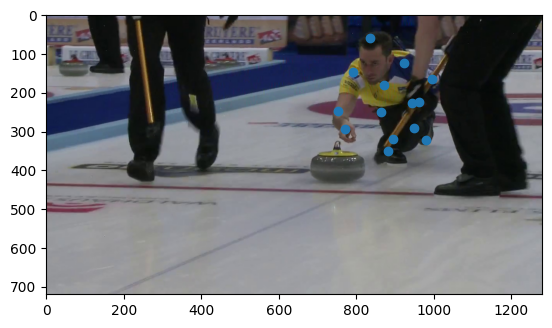

In [130]:



with Image.open("/home/mxerri/JointPoseEstimation/Data/mpii_images/images/060111501.jpg") as img:
    # Get the size of the image (width, height)
    img_size = img.size
   

img = read_image("/home/mxerri/JointPoseEstimation/Data/mpii_images/images/060111501.jpg")
print(img.shape)
print(np.array(annotations)[0])
plot_with_joints(img, np.array(annotations)[0])
          